In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Reading Parquet file

In [3]:
audio_df=pd.read_parquet(r"H:\IIT-M GUVI\Projects capstone\FinalProject1\0000 (1).parquet")
audio_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
audio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
audio_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
audio_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
#Handling missing values
audio_df.fillna('Unknown', inplace=True)  # Replace NaNs with 'Unknown'

In [4]:
audio_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
audio_df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
## Removing unwanted symbols
import re

def clean_text(text):
    # Remove non-alphanumeric characters except spaces
    return re.sub(r'[^a-zA-Z0-9\s\u00C0-\u017F]', '', text)

# Apply text cleaning to each column
audio_df['artists'] = audio_df['artists'].apply(clean_text)
audio_df['album_name'] = audio_df['album_name'].apply(clean_text)
audio_df['track_name'] = audio_df['track_name'].apply(clean_text)


In [7]:
## Handlig multiple languages
from unidecode import unidecode

# Normalize the text to remove accents
audio_df['artists'] = audio_df['artists'].apply(unidecode)
audio_df['album_name'] = audio_df['album_name'].apply(unidecode)
audio_df['track_name'] = audio_df['track_name'].apply(unidecode)


In [8]:
## Text case normalisation
audio_df['artists'] = audio_df['artists'].str.lower()
audio_df['album_name'] = audio_df['album_name'].str.lower()
audio_df['track_name'] = audio_df['track_name'].str.lower()


In [12]:
from googletrans import Translator

# Initialize the translator
translator = Translator()

# Function to translate text to English (or your target language)
def translate_to_english(text):
    try:
        translated = translator.translate(text, src='auto', dest='en')
        return translated.text
    except Exception as e:
        return text  # If translation fails, return original text

# Translate columns to English
audio_df['artists'] = audio_df['artists'].apply(translate_to_english)
audio_df['album_name'] = audio_df['album_name'].apply(translate_to_english)
audio_df['track_name'] = audio_df['track_name'].apply(translate_to_english)


KeyboardInterrupt: 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine the columns if you want to create a single feature for text analysis
text_data = audio_df[['artists', 'album_name', 'track_name']].apply(lambda x: ' '.join(x), axis=1)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')  # 'english' stop words, use None for multilingual stop words

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(text_data)


In [10]:
# Drop duplicate rows based on the 'artists', 'album_name', and 'track_name' columns
audio_df.drop_duplicates(subset=['artists', 'album_name', 'track_name'], inplace=True)


In [10]:
audio_df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
# # Fill missing values with a placeholder
# audio_df['artists'].fillna('Unknown Artist', inplace=True)
# audio_df['album_name'].fillna('Unknown Album', inplace=True)
# audio_df['track_name'].fillna('Unknown Track', inplace=True)
# Strip spaces and replace empty strings with placeholder
audio_df['artists'] = audio_df['artists'].str.strip().replace('', 'Unknown Artist')
audio_df['album_name'] = audio_df['album_name'].str.strip().replace('', 'Unknown Album')
audio_df['track_name'] = audio_df['track_name'].str.strip().replace('', 'Unknown Track')

# fill NaNs 
audio_df['artists'].fillna('Unknown Artist', inplace=True)
audio_df['album_name'].fillna('Unknown Album', inplace=True)
audio_df['track_name'].fillna('Unknown Track', inplace=True)


In [12]:
print(audio_df['artists'].isna().sum())
print(audio_df['album_name'].isna().sum())
print(audio_df['track_name'].isna().sum())


0
0
0


In [13]:
audio_df['artists'].replace('', 'Unknown Artist', inplace=True)
audio_df['album_name'].replace('', 'Unknown Album', inplace=True)
audio_df['track_name'].replace('', 'Unknown Track', inplace=True)


Data Visualization

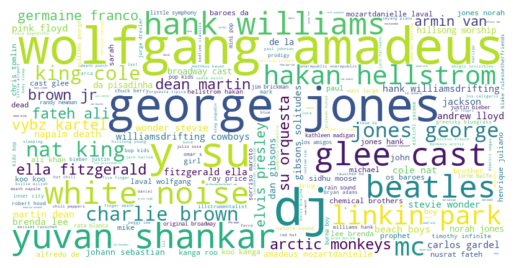

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for artists
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(audio_df['artists']))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


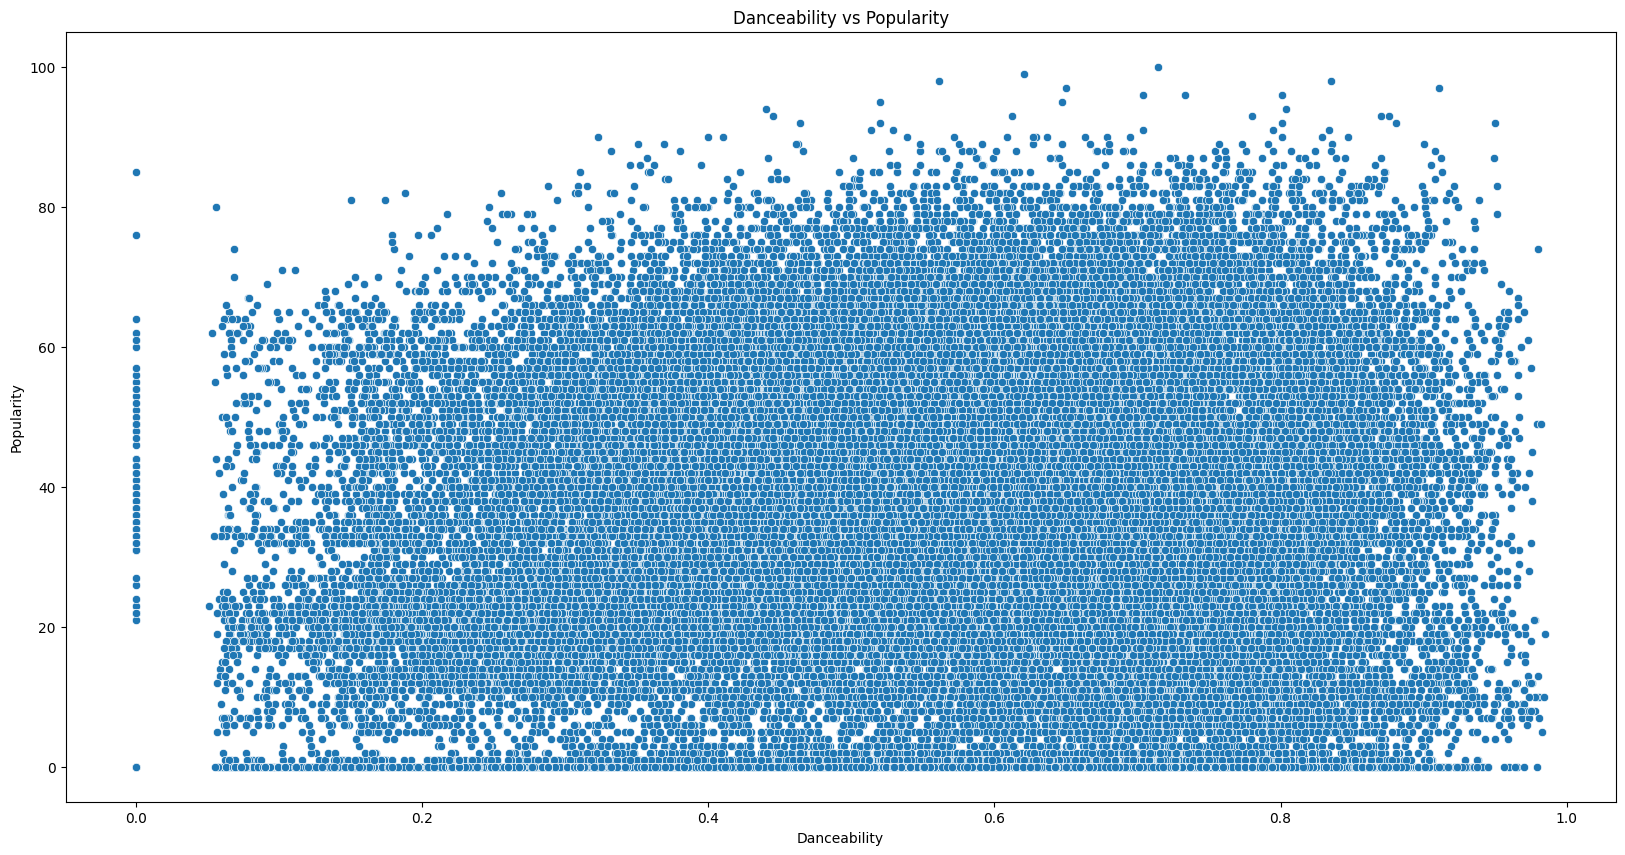

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for 'danceability' vs 'popularity'
plt.figure(figsize=(20, 10))
sns.scatterplot(data=audio_df, x='danceability', y='popularity')
plt.title('Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()


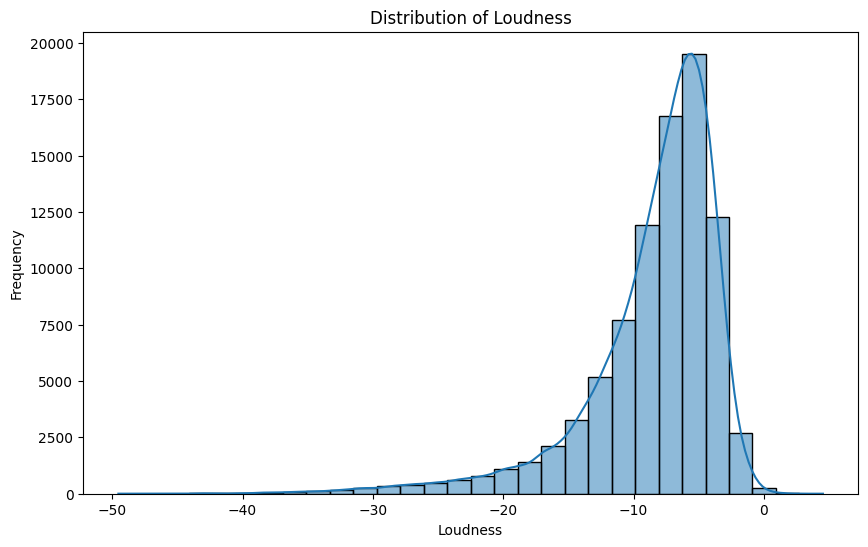

In [15]:
# Histogram for 'loudness'
plt.figure(figsize=(10, 6))
sns.histplot(audio_df['loudness'], bins=30, kde=True)
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.show()

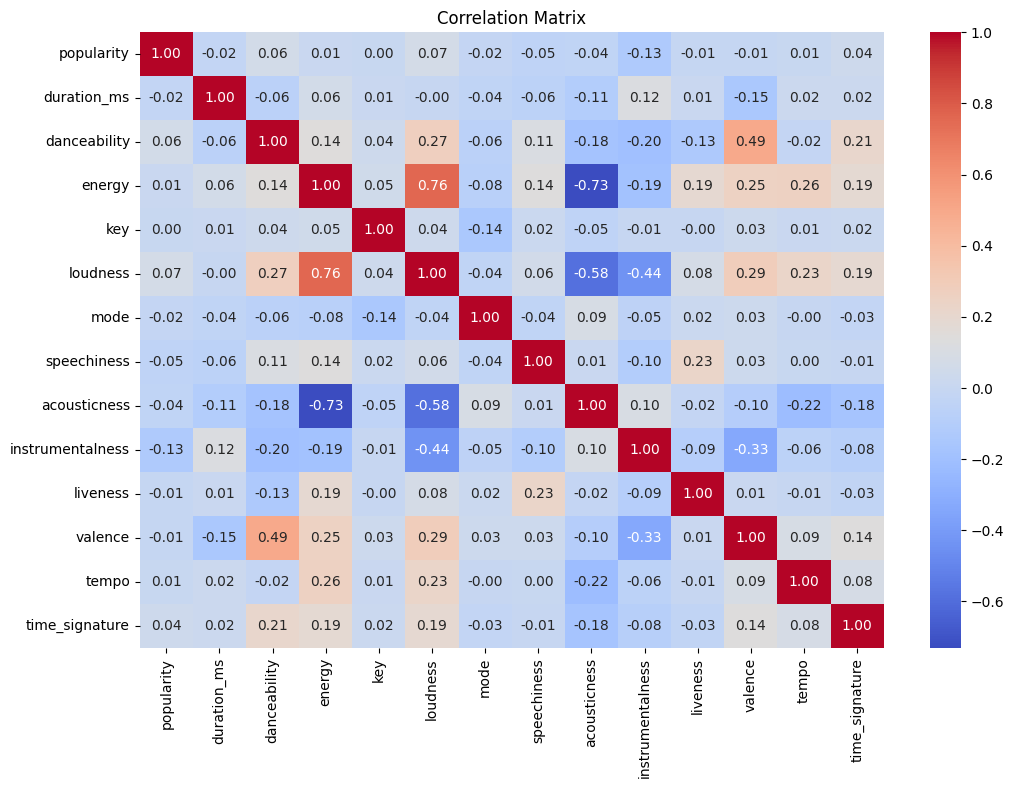

In [16]:
# Select only numeric columns
numeric_df = audio_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Correlation with popularity
correlations_with_popularity = numeric_df.corr()['popularity'].sort_values(ascending=False)
print(correlations_with_popularity)

popularity          1.000000
loudness            0.069365
danceability        0.062687
time_signature      0.035444
energy              0.011417
tempo               0.005247
key                 0.004116
valence            -0.010952
liveness           -0.012523
mode               -0.020168
duration_ms        -0.024590
acousticness       -0.035525
speechiness        -0.047146
instrumentalness   -0.128936
Name: popularity, dtype: float64


In [32]:
audio_df.to_excel("H:\IIT-M GUVI\Projects capstone\FinalProject1\Audio_df_new.xlsx",index=False)

In [44]:
audio_df.duplicated().sum()

0

In [14]:
# Convert the 'explicit' column to numerical (0 for False, 1 for True)
audio_df['explicit'] = audio_df['explicit'].astype(int)


In [15]:
# Get categorical columns
categorical_cols = audio_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Get numerical columns
numerical_cols = audio_df.select_dtypes(include=['number']).columns.tolist()

In [16]:
categorical_cols

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [17]:
numerical_cols

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [15]:
print("categorical columns:",len(categorical_cols))
print("numerical columns:",len(numerical_cols))


categorical columns: 5
numerical columns: 15


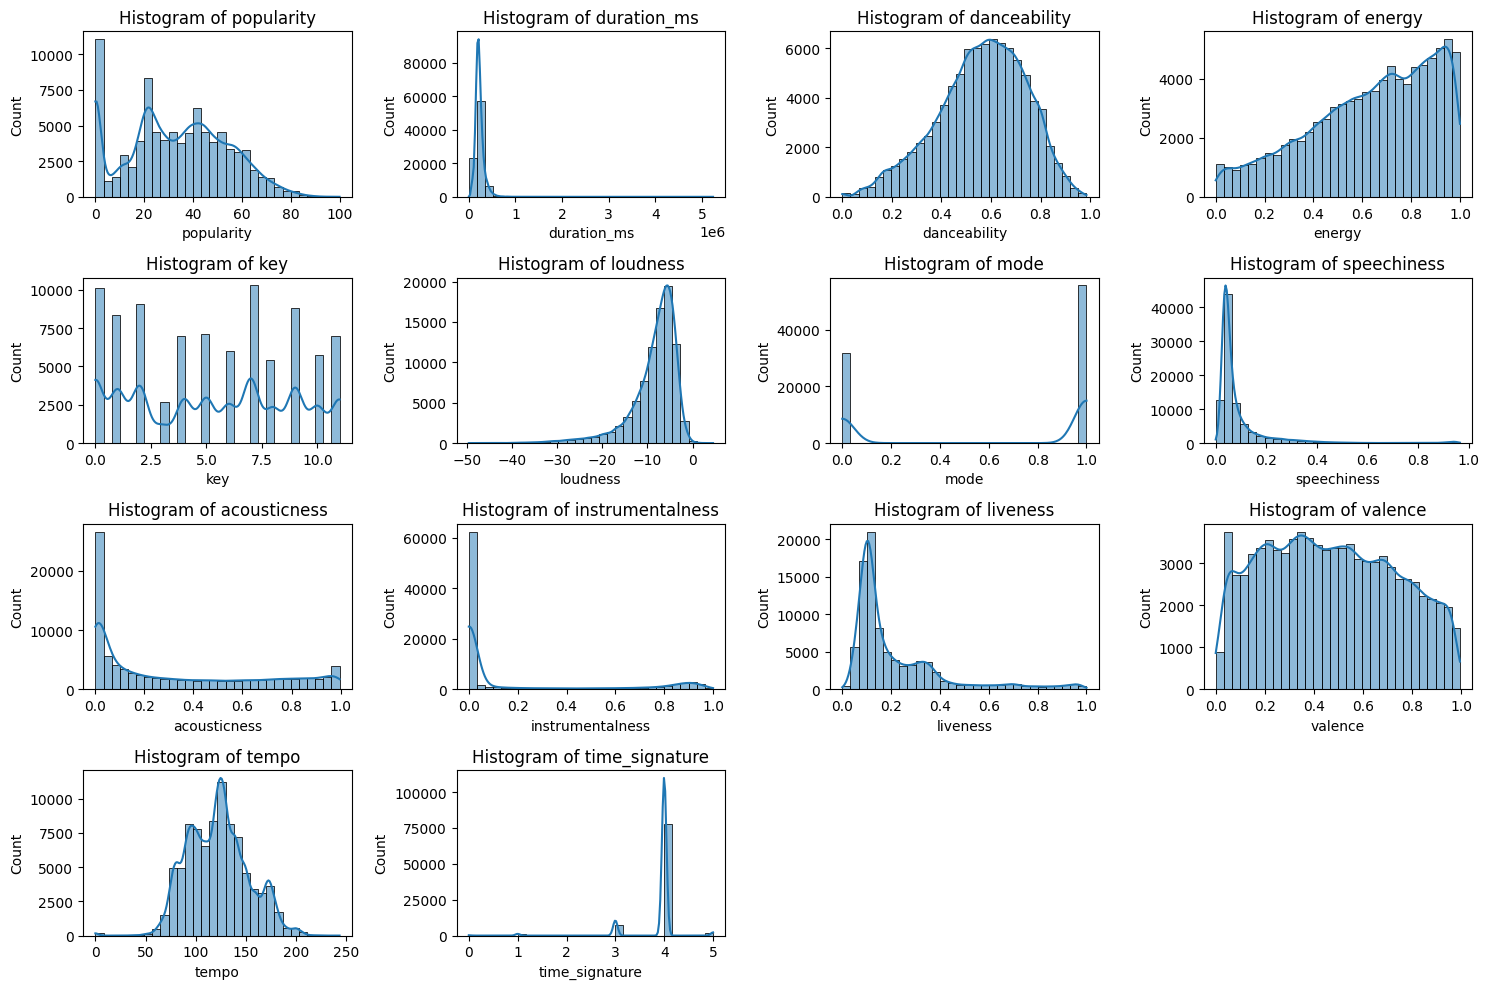

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for each feature
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 
            'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo', 'time_signature']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(audio_df[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")
plt.tight_layout()
plt.show()

In [43]:
# Check skewness and kurtosis for each feature
for feature in features:
    skew = audio_df[feature].skew()
    kurt = audio_df[feature].kurt()
    print(f"{feature} - Skewness: {skew:.2f}, Kurtosis: {kurt:.2f}")
    if abs(skew) > 0.5 or abs(kurt - 3) > 1:
        print(f"  --> {feature} is likely not normally distributed")
    else:
        print(f"  --> {feature} appears normal")

popularity - Skewness: 0.07, Kurtosis: -0.77
  --> popularity is likely not normally distributed
duration_ms - Skewness: 11.07, Kurtosis: 329.02
  --> duration_ms is likely not normally distributed
danceability - Skewness: -0.40, Kurtosis: -0.21
  --> danceability is likely not normally distributed
energy - Skewness: -0.57, Kurtosis: -0.59
  --> energy is likely not normally distributed
key - Skewness: -0.00, Kurtosis: -1.28
  --> key is likely not normally distributed
loudness - Skewness: -1.97, Kurtosis: 5.47
  --> loudness is likely not normally distributed
mode - Skewness: -0.56, Kurtosis: -1.68
  --> mode is likely not normally distributed
speechiness - Skewness: 4.51, Kurtosis: 26.11
  --> speechiness is likely not normally distributed
acousticness - Skewness: 0.66, Kurtosis: -1.06
  --> acousticness is likely not normally distributed
instrumentalness - Skewness: 1.53, Kurtosis: 0.59
  --> instrumentalness is likely not normally distributed
liveness - Skewness: 2.05, Kurtosis: 4.

Encoding

In [44]:
# to know unique values in categorical columns
for column in ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']:
    print(column, ":", audio_df[column].nunique())

track_id : 87506
artists : 31149
album_name : 44070
track_name : 68398
track_genre : 113


In [73]:
audio_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [75]:
audio_df.to_excel(r"H:\IIT-M GUVI\Projects capstone\FinalProject1\training_data_pop.xlsx")

In [16]:
# Frequency encoding
def frequency_encoding(df, column):
    freq = df[column].value_counts()
    df[column + '_freq'] = df[column].map(freq)
    df.drop(column, axis=1, inplace=True)  # Optionally drop the original column
    return df

for column in categorical_cols:
    audio_df_enc = frequency_encoding(audio_df, column)


In [17]:
# Generate frequency mappings for 'artists', 'album_name', and 'track_genre'
artists_freq = audio_df_enc['artists_freq'].value_counts()
album_name_freq = audio_df_enc['album_name_freq'].value_counts()
track_genre_freq = audio_df_enc['track_genre_freq'].value_counts()

In [18]:
import joblib
# Save the frequency mappings to .pkl files
joblib.dump(artists_freq, 'artists_freq.pkl')
joblib.dump(album_name_freq, 'album_name_freq.pkl')
joblib.dump(track_genre_freq, 'track_genre_freq.pkl')

['track_genre_freq.pkl']

In [46]:
print(audio_df_enc)

        popularity  duration_ms  explicit  danceability  energy  key  \
0               73       230666         0         0.676  0.4610    1   
1               55       149610         0         0.420  0.1660    1   
2               57       210826         0         0.438  0.3590    0   
3               71       201933         0         0.266  0.0596    0   
4               82       198853         0         0.618  0.4430    2   
...            ...          ...       ...           ...     ...  ...   
113995          21       384999         0         0.172  0.2350    5   
113996          22       385000         0         0.174  0.1170    0   
113997          22       271466         0         0.629  0.3290    0   
113998          41       283893         0         0.587  0.5060    7   
113999          22       241826         0         0.526  0.4870    1   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0         -6.746     0       0.1430        0.0322     

### Splitting the data into target and features

In [19]:
audio_df_enc.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_id_freq', 'artists_freq', 'album_name_freq', 'track_name_freq',
       'track_genre_freq'],
      dtype='object')

In [20]:
X = audio_df_enc.drop(columns=['popularity'])  
y = audio_df_enc['popularity']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# X_train_scaled and X_test_scaled are now the scaled feature sets


In [55]:
import joblib
joblib.dump(scaler, 'scaler_pop.pkl')  # Save the scaler as a .pkl file

['scaler_pop.pkl']

In [52]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R-squared: {r2_score(y_test, y_pred):.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}')

R-squared: 0.6666
Mean Absolute Error (MAE): 8.1805
Mean Squared Error (MSE): 140.3362


In [23]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [24]:
# Predict the target variable for the test set
y_pred = linear_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 399.3807373747475
R-squared (R²): 0.05130396026745776


In [52]:
## Linear regression
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = lin_reg.predict(X_test)

# Evaluate
print(f'Linear Regression R-squared: {r2_score(y_test, y_pred_lr):.4f}')
print(f'Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}')
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr):.4f}')

Linear Regression R-squared: 0.0513
Linear Regression MAE: 16.2482
Linear Regression MSE: 399.3807


In [53]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_reg.predict(X_test)

# Evaluate
print(f'Decision Tree R-squared: {r2_score(y_test, y_pred_dt):.4f}')
print(f'Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}')
print(f'Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.4f}')

Decision Tree R-squared: 0.3158
Decision Tree MAE: 10.5611
Decision Tree MSE: 288.0369


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_reg.predict(X_test)

# Evaluate
print(f'Gradient Boosting R-squared: {r2_score(y_test, y_pred_gb):.4f}')
print(f'Gradient Boosting MAE: {mean_absolute_error(y_test, y_pred_gb):.4f}')
print(f'Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gb):.4f}')


Gradient Boosting R-squared: 0.4788
Gradient Boosting MAE: 11.5926
Gradient Boosting MSE: 219.4139


In [55]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate
print(f'XGBoost R-squared: {r2_score(y_test, y_pred_xgb):.4f}')
print(f'XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}')
print(f'XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}')


XGBoost R-squared: 0.6448
XGBoost MAE: 8.8159
XGBoost MSE: 149.5226


In [54]:
## saving the model
import joblib

# Save the model to a file
joblib.dump(model, 'rf_audio_pop_model.pkl')  # Save the model as a .pkl file


['rf_audio_pop_model.pkl']

In [56]:
print(X_train.columns)

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_id_freq', 'artists_freq',
       'album_name_freq', 'track_name_freq', 'track_genre_freq'],
      dtype='object')


In [58]:
X_train.to_excel(r"H:\IIT-M GUVI\Projects capstone\FinalProject1\training_data_pop.xlsx",index=False)

### using label encoding

In [57]:
categorical_cols

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [29]:
audio_df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_id_freq', 'artists_freq', 'album_name_freq', 'track_name_freq',
       'track_genre_freq'],
      dtype='object')

In [1]:
import pandas as pd
audio_df=pd.read_excel(r"H:\IIT-M GUVI\Projects capstone\FinalProject1\training_data_pop.xlsx")

In [6]:
# Convert the 'explicit' column to numerical (0 for False, 1 for True)
audio_df['explicit'] = audio_df['explicit'].astype(int)

# Get categorical columns
categorical_cols = audio_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Get numerical columns
numerical_cols = audio_df.select_dtypes(include=['number']).columns.tolist()

In [7]:
categorical_cols

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [8]:
numerical_cols

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [5]:
audio_df.drop(columns='Unnamed: 0',inplace=True)

In [10]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # Initialize a LabelEncoder instance
# label_encoder = LabelEncoder()

# # Create a new DataFrame to hold the encoded values
# audio_label_enc = audio_df.copy()

# # Apply Label Encoding to each categorical column in the new DataFrame
# for col in categorical_cols:
#     audio_label_enc[col] = label_encoder.fit_transform(audio_label_enc[col])

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your data (audio_label_enc is the DataFrame you're working with)
# Assuming audio_label_enc is your DataFrame
# Create a new DataFrame to hold the encoded values
audio_label_enc = audio_df.copy()

# Initialize label encoders for each categorical column
encoder_artists = LabelEncoder()
encoder_album = LabelEncoder()
encoder_track_name = LabelEncoder()
encoder_genre = LabelEncoder()

# Fit encoders on categorical columns and transform
audio_label_enc['artists_encoded'] = encoder_artists.fit_transform(audio_label_enc['artists'])
audio_label_enc['album_name_encoded'] = encoder_album.fit_transform(audio_label_enc['album_name'])
audio_label_enc['track_name_encoded'] = encoder_track_name.fit_transform(audio_label_enc['track_name'])
audio_label_enc['track_genre_encoded'] = encoder_genre.fit_transform(audio_label_enc['track_genre'])

# Save the encoders for future use
joblib.dump(encoder_artists, 'encoder_artists.pkl')
joblib.dump(encoder_album, 'encoder_album.pkl')
joblib.dump(encoder_track_name, 'encoder_track_name.pkl')
joblib.dump(encoder_genre, 'encoder_genre.pkl')

# Optionally, save the modified DataFrame with encoded columns
audio_label_enc.to_excel('audio_label_enc.xlsx', index=False)


In [ ]:
# audio_label_enc.to_excel(r"H:\IIT-M GUVI\Projects capstone\FinalProject1\audio_label_enc.xlsx")

### model training

In [22]:
X = audio_label_enc.drop(columns=['popularity'])  
y = audio_label_enc['popularity']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R-squared: {r2_score(y_test, y_pred):.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}')

R-squared: 0.4821
Mean Absolute Error (MAE): 10.2875
Mean Squared Error (MSE): 218.0116


In [26]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate
print(f'XGBoost R-squared: {r2_score(y_test, y_pred_xgb):.4f}')
print(f'XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}')
print(f'XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}')

XGBoost R-squared: 0.4546
XGBoost MAE: 11.1176
XGBoost MSE: 229.5923


In [28]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [29]:
# Predict the target variable for the test set
y_pred = linear_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 405.8046929662231
R-squared (R²): 0.03604438298010315


## Genre Classification:
### Objective: Classify tracks by genre.

In [17]:
## Checking class imbalances

genre_counts = audio_label_enc['track_genre'].value_counts()

print(genre_counts)


track_genre
4      999
7      998
104    997
107    997
35     996
      ... 
71     232
85     222
53     209
56     134
89      74
Name: count, Length: 113, dtype: int64


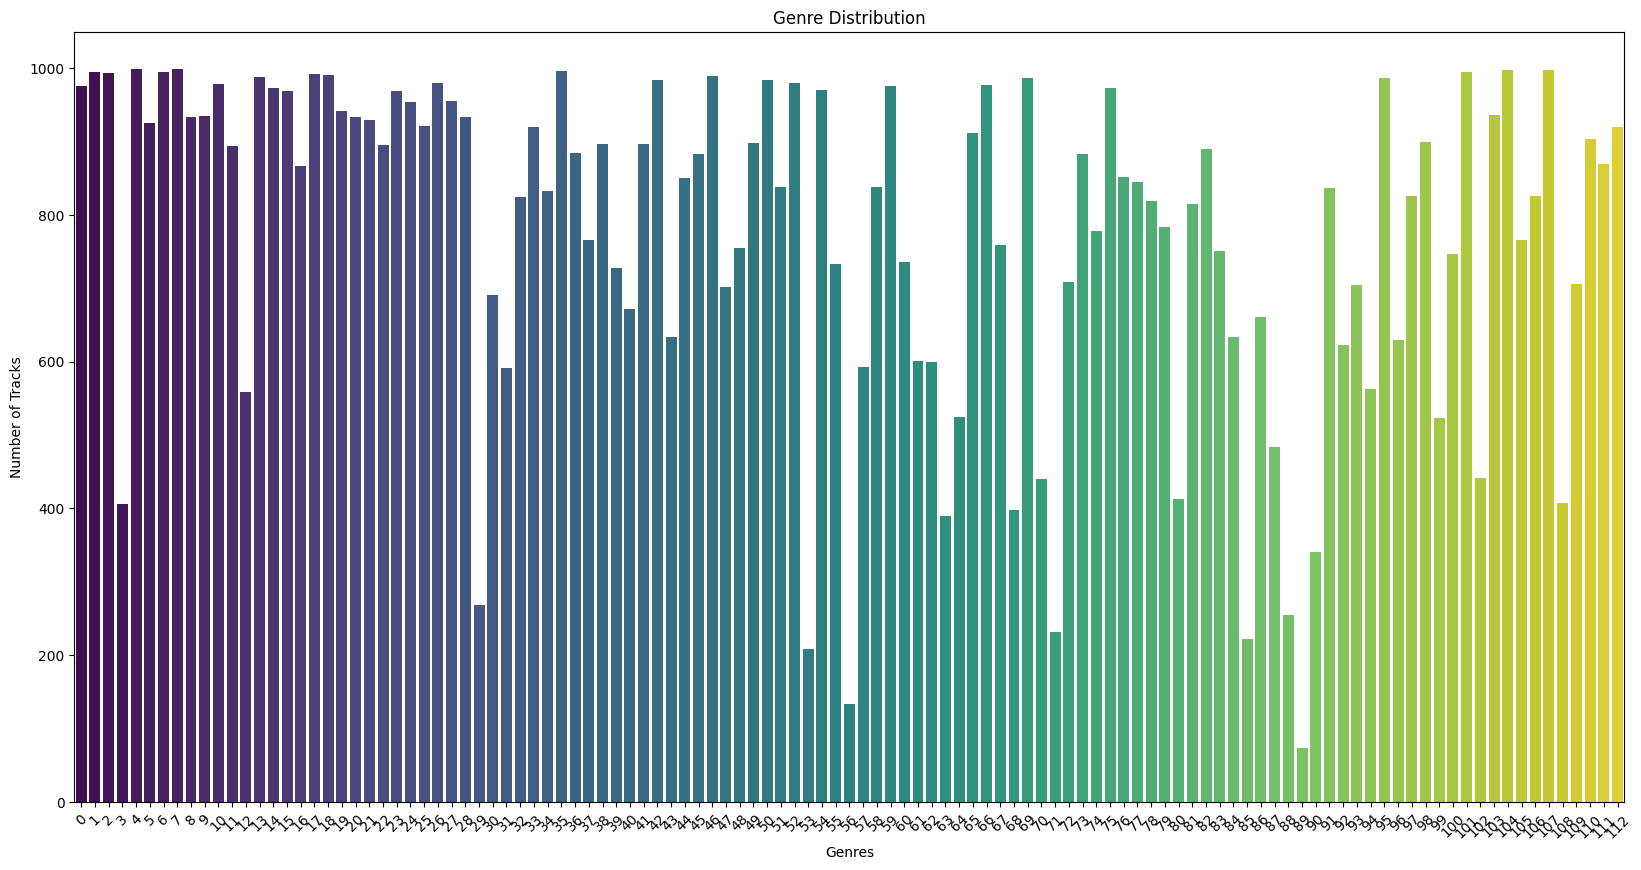

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the genre distribution
plt.figure(figsize=(20, 10))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Number of Tracks')
plt.show()

In [18]:
audio_label_enc.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [ ]:
# # X_train = audio_label_enc.drop(columns=['track_genre'])
# # y_train = audio_label_enc['track_genre']
# ## Reduced datasize
# # Take a sample of 10,000 rows (adjust this number based on your memory constraints)
# sample_df = audio_label_enc.sample(n=10000, random_state=42)
# X_sample = sample_df.drop(columns=['track_genre'])
# y_sample = sample_df['track_genre']


In [ ]:
# # X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [ ]:
# ## SMOTE technique for handling class imbalance
# from imblearn.over_sampling import SMOTE

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to training data (X_train, y_train)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Now, X_train_resampled and y_train_resampled are balanced


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
## Logistic regression
# from sklearn.linear_model import LogisticRegression

# # Initialize model with class weights
# lr_model = LogisticRegression(class_weight='balanced')

# # Train the model
# lr_model.fit(X_train_resampled, y_train_resampled)
# # Make predictions
# y_pred = lr_model.predict(X_test)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Print the results
# print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')
# print(f'F1 Score: {f1:.2f}')



Accuracy: 0.03
Precision: 0.01
Recall: 0.03
F1 Score: 0.01


c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# # Make predictions
# y_pred = rf_model.predict(X_test)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Print the results
# print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')
# print(f'F1 Score: {f1:.2f}')


Accuracy: 0.33
Precision: 0.33
Recall: 0.33
F1 Score: 0.31


In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report

# # Train an SVM model
# svm_model = SVC(random_state=42)
# svm_model.fit(X_train_resampled, y_train_resampled)

# # Make predictions
# y_pred_svm = svm_model.predict(X_test)

# # Evaluate the model
# print("SVM Classification Report:")
# print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        22
          12       0.03      0.30      0.05        10
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        22
          15       0.06      0.05      0.05        21
          16       0.00      0.00      0.00        16


c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Train a Gradient Boosting model
# gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train_resampled, y_train_resampled)

# # Make predictions
# y_pred_gb = gb_model.predict(X_test)

# # Evaluate the model
# print("Gradient Boosting Classification Report:")
# print(classification_report(y_test, y_pred_gb))

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred_gb)
# precision = precision_score(y_test, y_pred_gb, average='weighted')
# recall = recall_score(y_test, y_pred_gb, average='weighted')
# f1 = f1_score(y_test, y_pred_gb, average='weighted')

# # Print the results
# print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')
# print(f'F1 Score: {f1:.2f}')

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.12      0.10        16
           1       0.29      0.29      0.29        17
           2       0.12      0.08      0.10        25
           3       0.13      0.25      0.17         8
           4       0.30      0.27      0.29        22
           5       0.27      0.24      0.25        17
           6       0.48      0.61      0.54        18
           7       0.30      0.34      0.32        29
           8       0.14      0.05      0.07        21
           9       0.22      0.59      0.32        17
          10       0.56      0.50      0.53        18
          11       0.10      0.05      0.06        22
          12       0.31      0.50      0.38        10
          13       0.42      0.43      0.43        23
          14       0.18      0.18      0.18        22
          15       0.11      0.10      0.10        21
          16       0.40      0.50      0

c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### Clustering Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
audio_label_enc=pd.read_excel(r"H:\IIT-M GUVI\Projects capstone\FinalProject1\audio_label_enc.xlsx")

In [4]:
audio_label_enc.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'artists_encoded',
       'album_name_encoded', 'track_name_encoded', 'track_genre_encoded'],
      dtype='object')

In [5]:
# Drop non-numeric columns
numeric_features = audio_label_enc.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre'])

In [6]:
# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

In [14]:
import joblib
joblib.dump(scaler, 'scaler_clust.pkl')  # Save the scaler as a .pkl file

['scaler_clust.pkl']

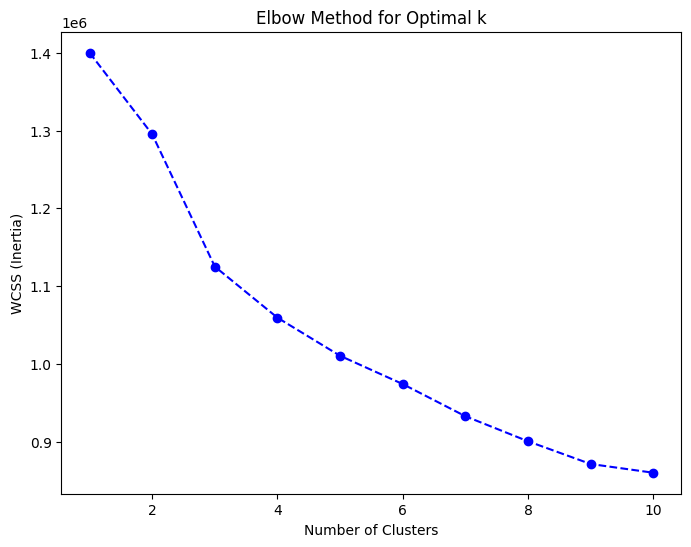

In [10]:
# To find out optimal clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Elbow Method
wcss = []  # List to store WCSS for each number of clusters

# Test different numbers of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [23]:
# Silhouette Score
sil_scores = []  # List to store silhouette scores

# Test different numbers of clusters (from 2 to 10, because silhouette score is undefined for 1 cluster)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    sil_score = silhouette_score(scaled_data, cluster_labels)
    sil_scores.append(sil_score)

# Plotting the Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='-', color='r')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

KeyboardInterrupt: 

In [7]:
# Apply K-Means Clustering
# Choose the number of clusters (you can adjust this number)
n_clusters = 4  # You can tune this by using methods like the Elbow Method or Silhouette Score
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=4, random_state=42)

In [8]:
# Add the cluster labels to the dataframe
audio_label_enc['cluster'] = kmeans.labels_

In [9]:
# Step 3: PCA for dimensionality reduction (2D visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

In [ ]:
# # Step 4: t-SNE for further dimensionality reduction (better for visualization)
# tsne = TSNE(n_components=2, random_state=42)
# tsne_components = tsne.fit_transform(scaled_data)

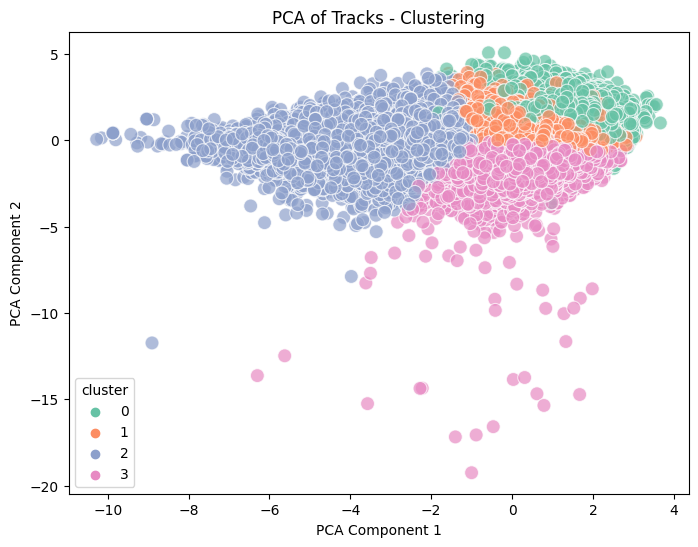

In [24]:
# Step 5: Plotting the results
# PCA plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=audio_label_enc['cluster'], palette='Set2', s=100, alpha=0.7)
plt.title('PCA of Tracks - Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Genre classification

In [10]:
# Step 1: Prepare the data for classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Drop non-numeric columns and prepare features (X) and target (y)
X = audio_label_enc.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'cluster'])
y = audio_label_enc['track_genre']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = clf.predict(X_test)

# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9058964689749743
Precision: 0.9071183907153797
Recall: 0.9058964689749743
F1 Score: 0.9038037914718219

Classification Report:
                   precision    recall  f1-score   support

         acoustic       1.00      1.00      1.00       202
         afrobeat       1.00      1.00      1.00       187
         alt-rock       1.00      1.00      1.00       194
      alternative       0.95      0.98      0.97       101
          ambient       0.98      0.96      0.97       181
            anime       0.93      0.96      0.94       158
      black-metal       0.99      0.99      0.99       191
        bluegrass       0.99      0.96      0.97       224
            blues       0.91      0.95      0.93       171
           brazil       0.95      0.97      0.96       201
        breakbeat       0.97      0.98      0.98       200
          british       0.92      0.82      0.87       173
         cantopop       0.96      0.88      0.92       100
    chicago-house       0.99      

In [11]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(clf, 'rf_model_genre.pkl')


['rf_model_genre.pkl']

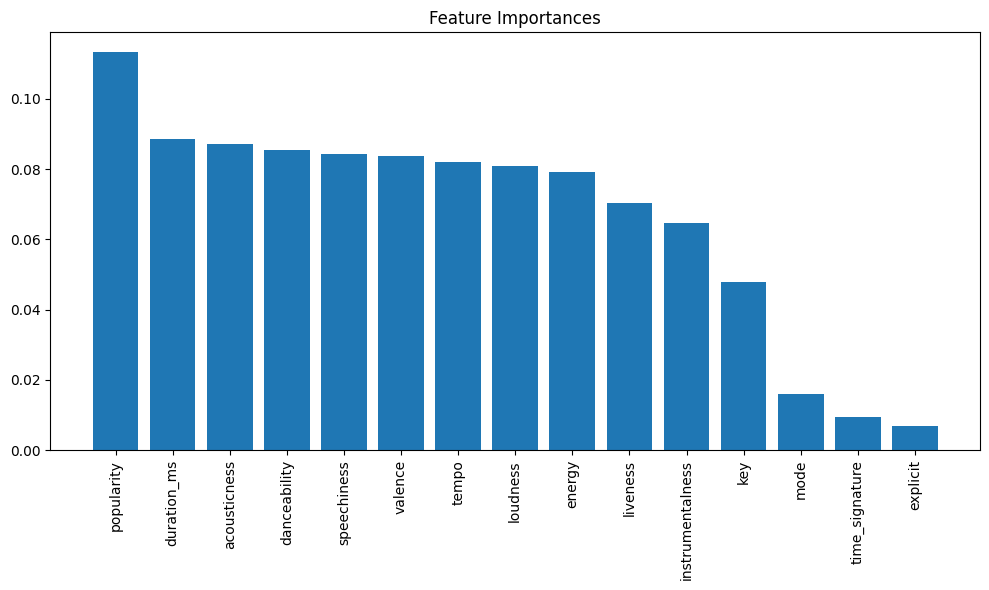

In [26]:
# Optional: Feature Importances (Random Forests)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [27]:
## Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


MemoryError: Unable to allocate 60.4 MiB for an array with shape (70004, 113) and data type float64

In [28]:
from sklearn.svm import SVC

# Train SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.0375385670209119
Precision: 0.014514693578996991
Recall: 0.0375385670209119
F1 Score: 0.011811541016586652

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.00      0.00      0.00       187
           2       0.02      0.19      0.03       194
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00       181
           5       0.00      0.00      0.00       158
           6       0.00      0.00      0.00       191
           7       0.00      0.00      0.00       224
           8       0.00      0.00      0.00       171
           9       0.00      0.00      0.00       201
          10       0.25      0.01      0.01       200
          11       0.00      0.00      0.00       173
          12       0.00      0.00      0.00       100
          13       0.06      0.24      0.09       216
          14       0.09      0.04

c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Drop non-numeric columns and prepare features (X) and target (y)
X = audio_label_enc.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'cluster'])
y = audio_label_enc['track_genre']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.4341218146497543
Precision: 0.43658540981406546
Recall: 0.4341218146497543
F1 Score: 0.4304408222624635

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.29      0.29       202
           1       0.33      0.35      0.34       187
           2       0.32      0.41      0.36       194
           3       0.71      0.50      0.59       101
           4       0.36      0.42      0.38       181
           5       0.26      0.30      0.28       158
           6       0.61      0.61      0.61       191
           7       0.50      0.54      0.52       224
           8       0.36      0.32      0.34       171
           9       0.29      0.37      0.33       201
          10       0.51      0.52      0.51       200
          11       0.16      0.10      0.13       173
          12       0.30      0.31      0.30       100
          13       0.60      0.51      0.55       216
          14       0.46      0.4

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.06604959433207633
Precision: 0.03440350993997238
Recall: 0.06604959433207633
F1 Score: 0.03541599466649534

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.01      0.01       202
           1       0.00      0.00      0.00       187
           2       0.01      0.01      0.01       194
           3       0.00      0.00      0.00       101
           4       0.04      0.10      0.06       181
           5       0.02      0.05      0.02       158
           6       0.08      0.17      0.11       191
           7       0.13      0.04      0.06       224
           8       0.00      0.00      0.00       171
           9       0.06      0.06      0.06       201
          10       0.20      0.27      0.23       200
          11       0.00      0.00      0.00       173
          12       0.00      0.00      0.00       100
          13       0.09      0.06      0.08       216
          14     

c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Manishma\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("K-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Results:
Accuracy: 0.08399040109701748
Precision: 0.1129693359618257
Recall: 0.08399040109701748
F1 Score: 0.08340360270115699

Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.09      0.04       202
           1       0.03      0.12      0.04       187
           2       0.07      0.20      0.11       194
           3       0.25      0.45      0.32       101
           4       0.04      0.12      0.05       181
           5       0.03      0.11      0.04       158
           6       0.04      0.12      0.05       191
           7       0.02      0.06      0.03       224
           8       0.10      0.23      0.14       171
           9       0.02      0.07      0.04       201
          10       0.04      0.09      0.05       200
          11       0.03      0.07      0.04       173
          12       0.01      0.03      0.02       100
          13       0.06      0.11      0.08       216
          14      